Saving covtype.csv to covtype (1).csv
Dataset shape: (581012, 55)
   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220    

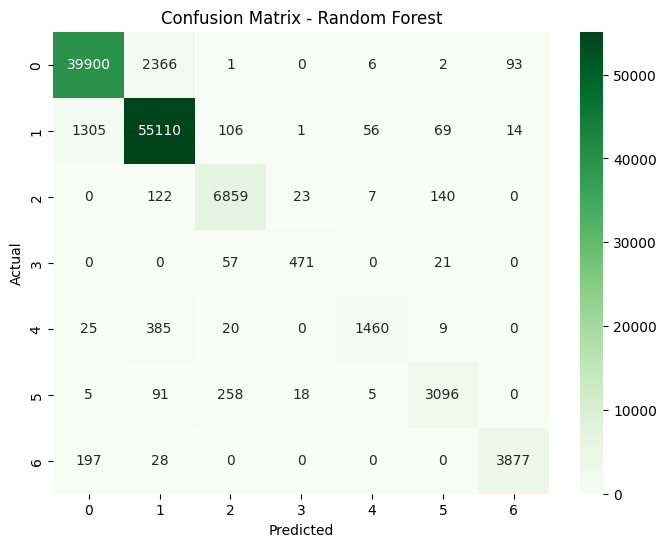

XGBoost Accuracy: 0.8696074972246843
Classification Report (XGB):
               precision    recall  f1-score   support

           0       0.86      0.84      0.85     42368
           1       0.87      0.90      0.88     56661
           2       0.89      0.91      0.90      7151
           3       0.88      0.86      0.87       549
           4       0.89      0.61      0.72      1899
           5       0.85      0.80      0.82      3473
           6       0.95      0.91      0.93      4102

    accuracy                           0.87    116203
   macro avg       0.88      0.83      0.85    116203
weighted avg       0.87      0.87      0.87    116203



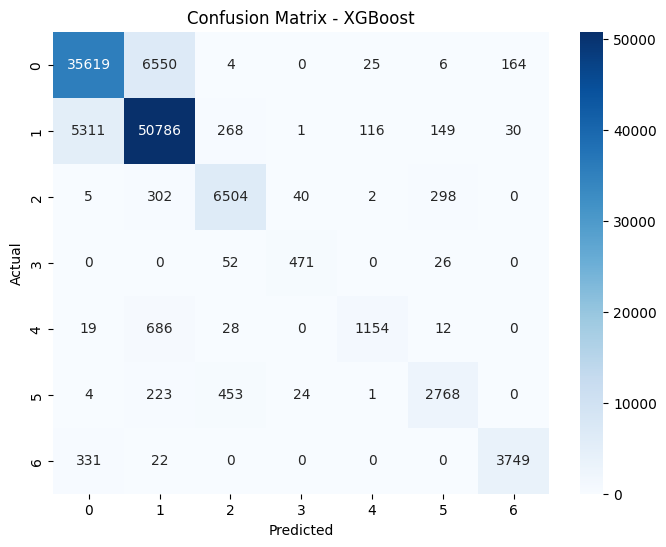

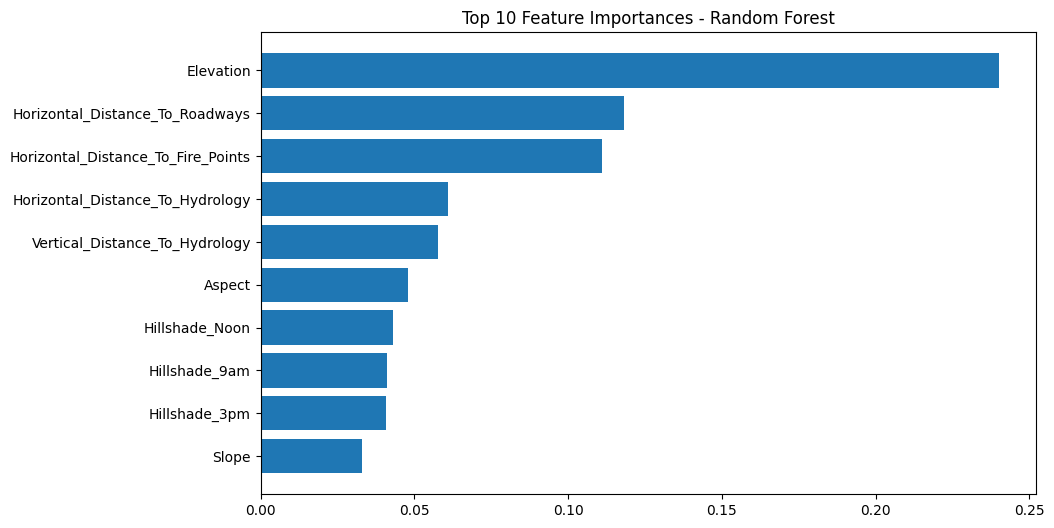

In [2]:
# Task 3: Forest Cover Type Classification

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# =============================
# Step 1: Upload dataset
# =============================
uploaded = files.upload()

# Assuming dataset is named "covtype.csv" (from UCI or Kaggle)
df = pd.read_csv("covtype.csv")

# =============================
# Step 2: Basic EDA
# =============================
print("Dataset shape:", df.shape)
print(df.head())
print(df.info())
print(df["Cover_Type"].value_counts())

# =============================
# Step 3: Features & Target
# =============================
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]

# Adjust labels to start at 0 (XGBoost requirement)
y = y - 1

# =============================
# Step 4: Train-Test Split
# =============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =============================
# Step 5: Feature Scaling
# =============================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# =============================
# Step 6: Random Forest Model
# =============================
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report (RF):\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix - RF
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# =============================
# Step 7: XGBoost Model
# =============================
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report (XGB):\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix - XGB
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# =============================
# Step 8: Feature Importance (RF)
# =============================
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [df.drop("Cover_Type", axis=1).columns[i] for i in indices])
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()
